In [6]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:
import numpy as np
import matplotlib.pyplot as plt

import BanditProblems as bp

In [8]:
number_of_action = 1000
number_of_arms   = 100
train_func = bp.train_two_peak
bandit_algo = bp.gp_ts
x = np.linspace(0, 1, number_of_arms)
y = train_func(x)[1]

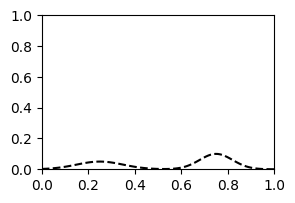

In [9]:
bp.plot_train_func(x,y)

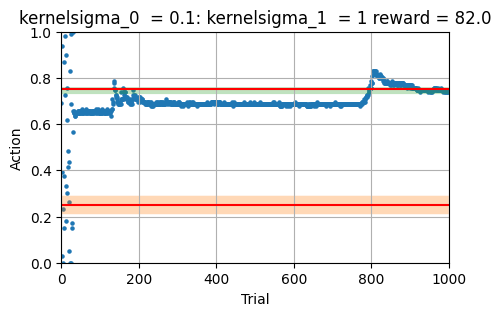

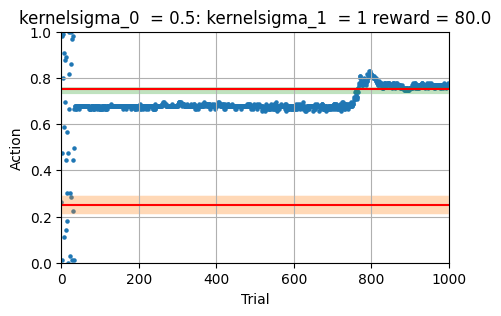

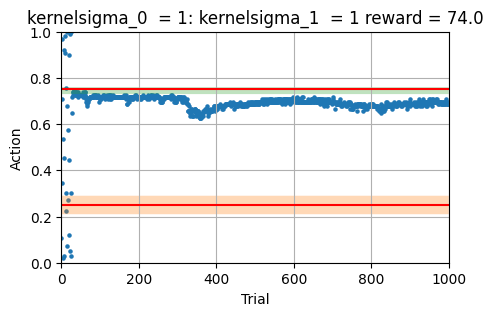

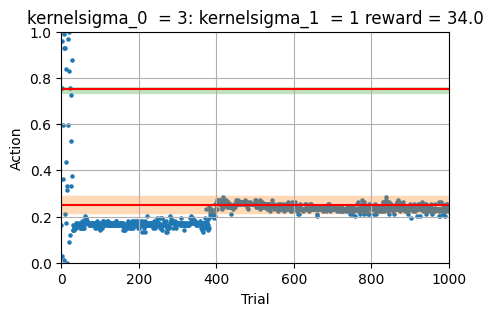

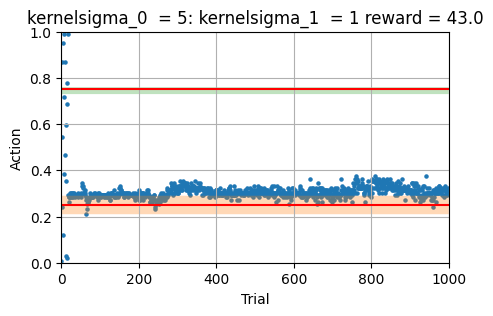

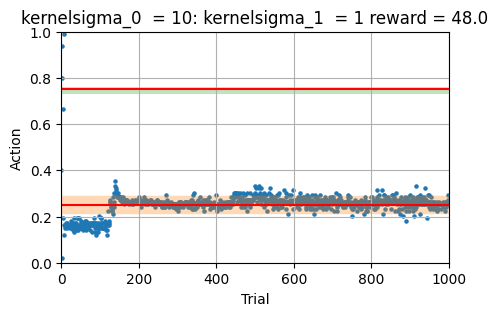

[[ 86. 103.  50.  79.  48.  32.  62.  89.  87.  82.]
 [ 90.  69.  40.  80.  61. 102.  31.  70.  78.  80.]
 [101. 103.  95.  91.  36.  92.  51.  82.  68.  74.]
 [ 87.  74.  35.  84.  35.  62.  81.  94.  46.  34.]
 [ 97.  85.  46.  85.  95.  47.  43. 103.  65.  43.]
 [ 88.  90.  42.  98.  89.  26.  24.  44.  48.  48.]]


In [10]:
kernel_sigma = [[0.1, 1], [0.5, 1], [1,1], [3,1], [5,1], [10, 1]]
train_area = {'mean' : 0.25, 'min' : 0.21, 'max' : 0.29},{'mean' : 0.75, 'min' : 0.73, 'max' : 0.76},
T = 10
total_rewards = np.array([])
for k in kernel_sigma:
    for i in range(T):
        y_train, x_train = bp.sim_GP(bandit_algo, number_of_action, train_func, x, bp.GP, is_gp_plot=False, kernel_sigma = k)    
        total_rewards = np.append(total_rewards, sum(y_train))
    title = f'kernelsigma_0  = {k[0]}: kernelsigma_1  = {k[1]} reward = {sum(y_train)}'
    bp.plot_transition_action(x_train, number_of_action, train_area, titel = title)
total_rewards = total_rewards.reshape(len(kernel_sigma), T)
print(total_rewards)

In [11]:
index = 0
t_r = total_rewards
for i in kernel_sigma:
    print(f'ave_reward = {np.mean(t_r[index])} max_r = {np.max(t_r[index])} min_r = {np.min(t_r[index])} var_r = "{round(np.sqrt(np.var(t_r[index])), 2)}" kernel_sigma_0 = "{i[0]}" kernel_sigma_0 = "{i[1]}"')
    index += 1

ave_reward = 71.8 max_r = 103.0 min_r = 32.0 var_r = "21.4" kernel_sigma_0 = "0.1" kernel_sigma_0 = "1"
ave_reward = 70.1 max_r = 102.0 min_r = 31.0 var_r = "20.47" kernel_sigma_0 = "0.5" kernel_sigma_0 = "1"
ave_reward = 79.3 max_r = 103.0 min_r = 36.0 var_r = "21.01" kernel_sigma_0 = "1" kernel_sigma_0 = "1"
ave_reward = 63.2 max_r = 94.0 min_r = 34.0 var_r = "22.63" kernel_sigma_0 = "3" kernel_sigma_0 = "1"
ave_reward = 70.9 max_r = 103.0 min_r = 43.0 var_r = "23.39" kernel_sigma_0 = "5" kernel_sigma_0 = "1"
ave_reward = 59.7 max_r = 98.0 min_r = 24.0 var_r = "27.0" kernel_sigma_0 = "10" kernel_sigma_0 = "1"


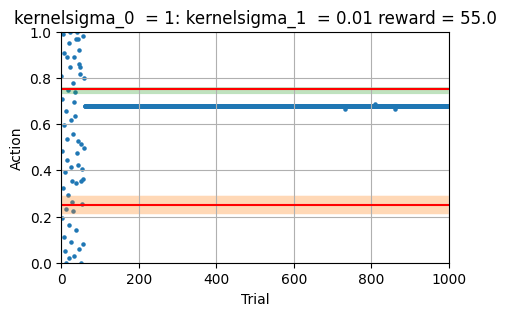

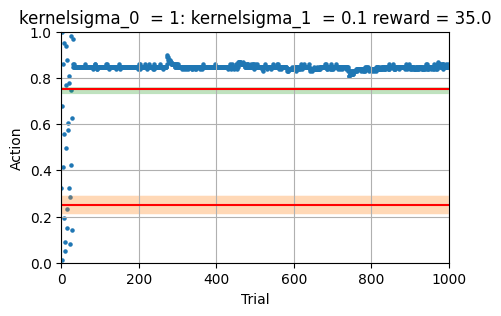

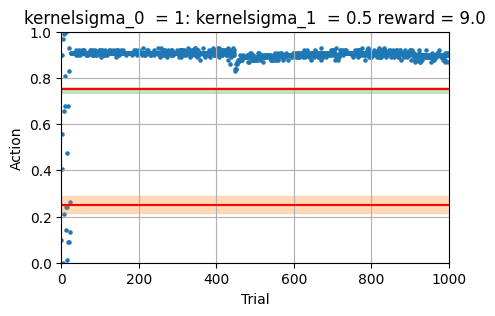

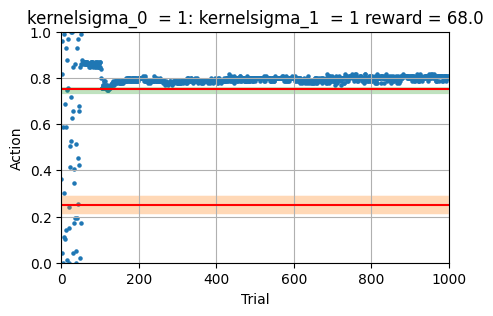

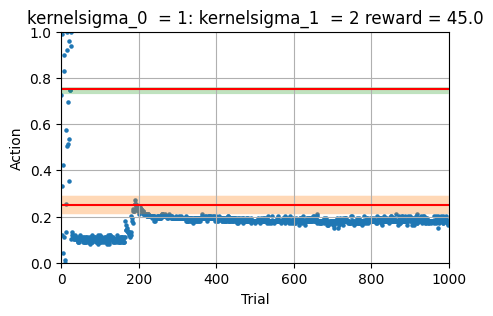

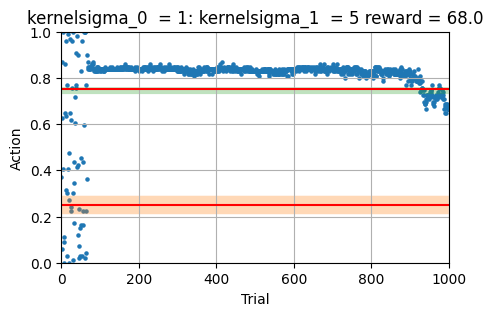

[[ 43.  69. 102.  48.  78.  58.  42.  35.  20.  55.]
 [ 83. 116.  22.   9.  84.  72.  32.  40.  49.  35.]
 [ 23.   9. 102.  45.  83.  46.  90.  47.  83.   9.]
 [106.  35.  85.   3.  72.  33.  91.  61.  75.  68.]
 [ 82.   7.  81.  43.  96.  85.  43. 100.  17.  45.]
 [ 76.  76.  85.  39.  80.  75.  85.  71.  46.  68.]]


In [12]:
kernel_sigma = [[1, 0.01], [1, 0.1], [1,0.5], [1,1], [1,2], [1, 5]]
train_area = {'mean' : 0.25, 'min' : 0.21, 'max' : 0.29},{'mean' : 0.75, 'min' : 0.73, 'max' : 0.76},
total_rewards = np.array([])
for k in kernel_sigma:
    for i in range(T):
        y_train, x_train = bp.sim_GP(bandit_algo, number_of_action, train_func, x, bp.GP, is_gp_plot=False, kernel_sigma = k)    
        total_rewards = np.append(total_rewards, sum(y_train))
    title = f'kernelsigma_0  = {k[0]}: kernelsigma_1  = {k[1]} reward = {sum(y_train)}'
    bp.plot_transition_action(x_train, number_of_action, train_area, titel = title)
total_rewards = total_rewards.reshape(len(kernel_sigma), T)
print(total_rewards)

In [13]:
index = 0
t_r = total_rewards
for i in kernel_sigma:
    print(f'ave_reward = {np.mean(t_r[index])} max_r = {np.max(t_r[index])} min_r = {np.min(t_r[index])} var_r = "{round(np.sqrt(np.var(t_r[index])), 2)}" kernel_sigma_0 = "{i[0]}" kernel_sigma_0 = "{i[1]}"')
    index += 1

ave_reward = 55.0 max_r = 102.0 min_r = 20.0 var_r = "22.2" kernel_sigma_0 = "1" kernel_sigma_0 = "0.01"
ave_reward = 54.2 max_r = 116.0 min_r = 9.0 var_r = "31.66" kernel_sigma_0 = "1" kernel_sigma_0 = "0.1"
ave_reward = 53.7 max_r = 102.0 min_r = 9.0 var_r = "32.38" kernel_sigma_0 = "1" kernel_sigma_0 = "0.5"
ave_reward = 62.9 max_r = 106.0 min_r = 3.0 var_r = "29.42" kernel_sigma_0 = "1" kernel_sigma_0 = "1"
ave_reward = 59.9 max_r = 100.0 min_r = 7.0 var_r = "31.48" kernel_sigma_0 = "1" kernel_sigma_0 = "2"
ave_reward = 70.1 max_r = 85.0 min_r = 39.0 var_r = "14.79" kernel_sigma_0 = "1" kernel_sigma_0 = "5"


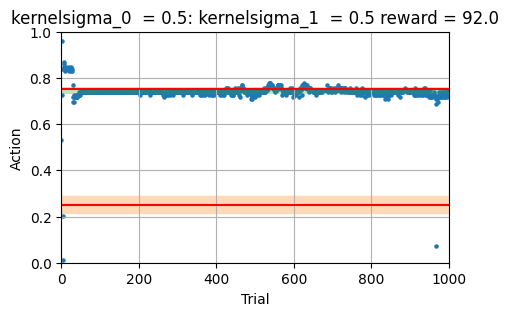

[[41. 16. 37. 50. 64. 42. 69. 48. 36. 92.]]


In [14]:
kernel_sigma = [[0.5, 0.5]]
train_area = {'mean' : 0.25, 'min' : 0.21, 'max' : 0.29},{'mean' : 0.75, 'min' : 0.73, 'max' : 0.76},
total_rewards = np.array([])
for k in kernel_sigma:
    for i in range(T):
        y_train, x_train = bp.sim_GP(bandit_algo, number_of_action, train_func, x, bp.GP, is_gp_plot=False, kernel_sigma = k)    
        total_rewards = np.append(total_rewards, sum(y_train))
    title = f'kernelsigma_0  = {k[0]}: kernelsigma_1  = {k[1]} reward = {sum(y_train)}'
    bp.plot_transition_action(x_train, number_of_action, train_area, titel = title)
total_rewards = total_rewards.reshape(len(kernel_sigma), T)
print(total_rewards)

In [15]:
index = 0
t_r = total_rewards
for i in kernel_sigma:
    print(f'ave_reward = {np.mean(t_r[index])} max_r = {np.max(t_r[index])} min_r = {np.min(t_r[index])} var_r = "{round(np.sqrt(np.var(t_r[index])), 2)}" kernel_sigma_0 = "{i[0]}" kernel_sigma_0 = "{i[1]}"')
    index += 1

ave_reward = 49.5 max_r = 92.0 min_r = 16.0 var_r = "19.97" kernel_sigma_0 = "0.5" kernel_sigma_0 = "0.5"
